In [22]:
%reset
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import gc
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
gc.collect()

0

In [0]:
def extract_fn_2(tfrecord):
        # Extract features using the keys set during creation
        features = {
            'feature1': tf.FixedLenFeature([128], tf.float32,),
            'feature2': tf.FixedLenFeature([128], tf.float32),
            'label': tf.FixedLenFeature([10],tf.int64)
        }

        # Extract the data record
        sample = tf.parse_single_example(tfrecord, features)
        data = tf.stack([sample['feature1'], sample['feature2']])
        label = sample['label']
        return [data,label] 

In [0]:
def extract_fn_4(tfrecord):
        # Extract features using the keys set during creation
        features = {
            'feature1': tf.FixedLenFeature([128], tf.float32),
            'feature2': tf.FixedLenFeature([128], tf.float32),
            'feature3': tf.FixedLenFeature([128], tf.float32),
            'feature4': tf.FixedLenFeature([128], tf.float32),
            'label': tf.FixedLenFeature([10],tf.int64)
        }

        # Extract the data record
        sample = tf.parse_single_example(tfrecord, features)
        data = tf.stack([sample['feature1'], sample['feature2'], sample['feature3'], sample['feature4']])
        label = sample['label']
        return [data,label] 

In [0]:
def dataset_tonumpy(dataset,dim):
  #splitting datasets into X and Y
  X = []
  Y = []
  it= dataset.make_one_shot_iterator().get_next()
  sess = tf.Session()
  with tf.train.MonitoredTrainingSession() as sess:
    while not sess.should_stop():
            data =sess.run(it)
            X.append(data[0])
            Y.append(data[1])
  
  
  testX = np.array(X).reshape(600000,dim,128)
  testY = np.array(Y).reshape(600000,10)
  return testX,testY

In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Loading our best models.

## First: The Fully Connected Model

In [0]:
fc_bestmodel = load_model('/content/drive/My Drive/Models/model4.h5')

## Second: The CNN Model

In [0]:
cnn_bestmodel = load_model('/content/drive/My Drive/Best_Models/com3_model.h5')

# Loading test data for models 

In [8]:
# for fully connected model.
fc_test_dataset=tf.data.TFRecordDataset(['/content/drive/My Drive/TFDatasets/com1_test_data.tfrecord'])
fc_test_dataset=fc_test_dataset.map(extract_fn_4).batch(1000)
fc_testX, fc_testY = dataset_tonumpy(fc_test_dataset,4)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [35]:
# for the CNN model.
cnn_test_dataset=tf.data.TFRecordDataset(['/content/drive/My Drive/TFDatasets/com3_test_data.tfrecord'])
cnn_test_dataset=cnn_test_dataset.map(extract_fn_4).batch(1000)
cnn_testX, cnn_testY = dataset_tonumpy(cnn_test_dataset,4)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Evaluating data on models

In [12]:
fc_bestmodel.evaluate(fc_testX,fc_testY,verbose =1)

600000/600000 [==============================] - 110s 183us/sample - loss: 1.3647 - acc: 0.4587


[1.3647445179303488, 0.45867166]

In [38]:
cnn_bestmodel.evaluate(cnn_testX,cnn_testY,verbose =1)

600000/600000 [==============================] - 77s 128us/sample - loss: 1.0965 - acc: 0.5454


[1.0965033270486195, 0.54542834]

Overall Accuracy:  0.10543651849880224
Overall Accuracy:  0.10871753573585666
Overall Accuracy:  0.11675755244053394
Overall Accuracy:  0.14890984483681113
Overall Accuracy:  0.20056194808670055
Overall Accuracy:  0.2657659134883416
Overall Accuracy:  0.3396761133603239
Overall Accuracy:  0.44335594903193776
Overall Accuracy:  0.564035964035964
Overall Accuracy:  0.6629843418259024
Overall Accuracy:  0.7474430108964503
Overall Accuracy:  0.7849530406980617
Overall Accuracy:  0.7981181633806563
Overall Accuracy:  0.8004080131099295
Overall Accuracy:  0.8000745106008263
Overall Accuracy:  0.79924330423816
Overall Accuracy:  0.8028841339252929
Overall Accuracy:  0.8047528580475286
Overall Accuracy:  0.8061466499769419
Overall Accuracy:  0.8049413958444326


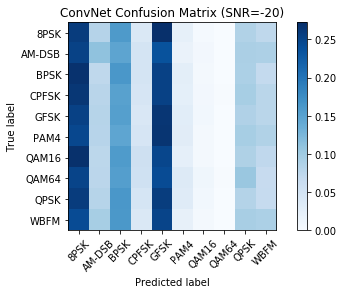

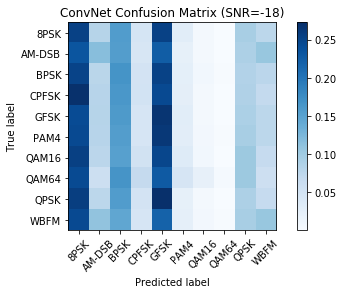

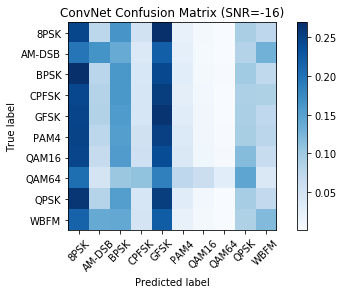

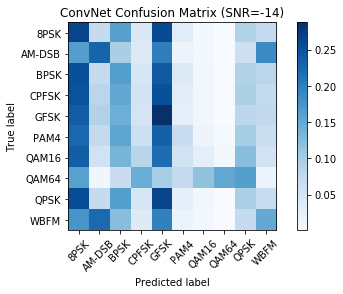

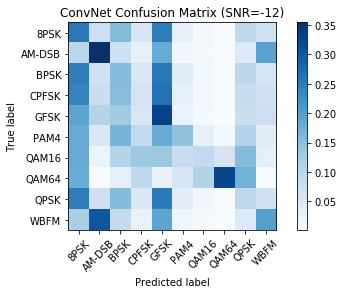

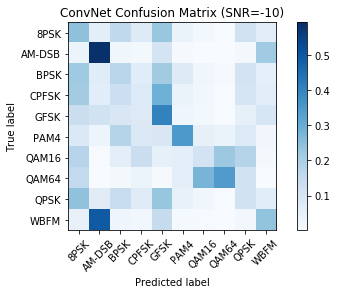

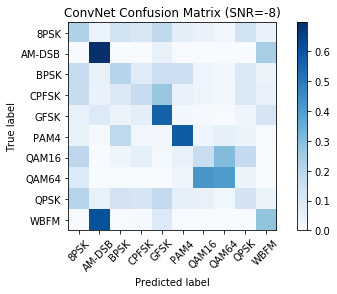

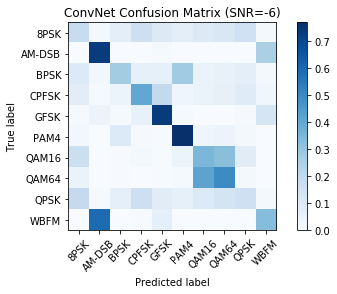

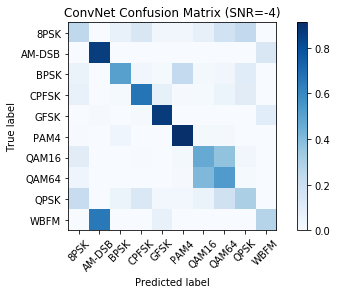

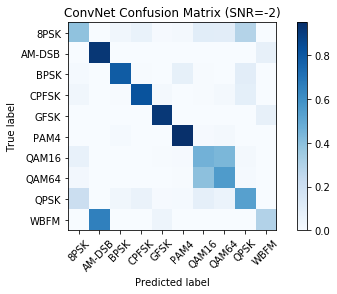

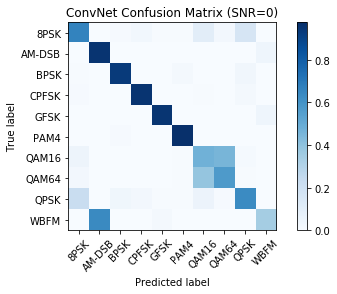

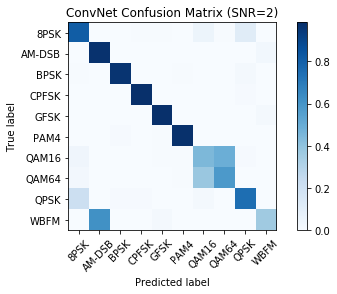

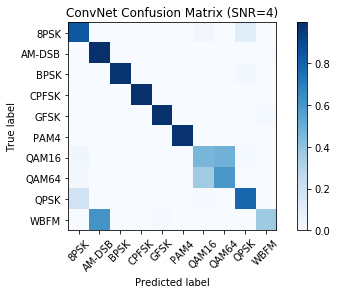

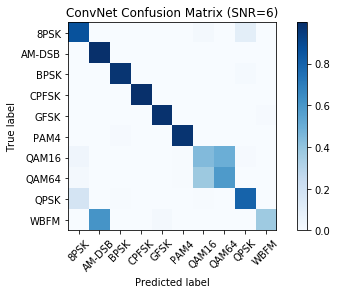

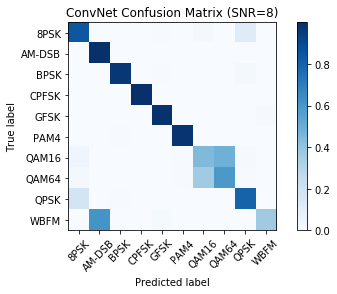

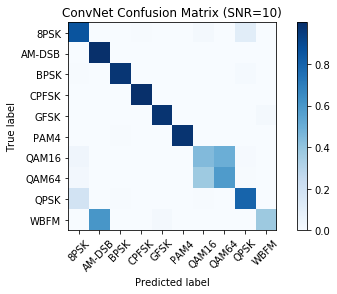

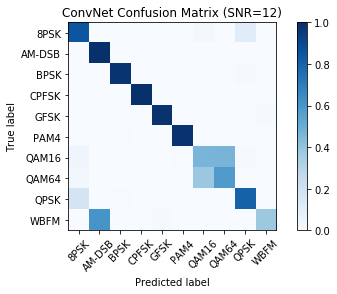

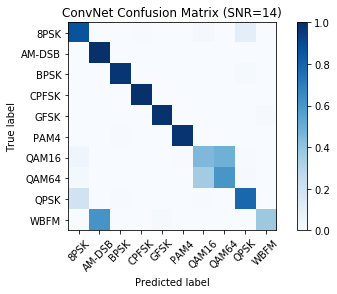

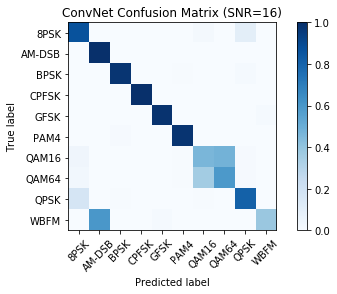

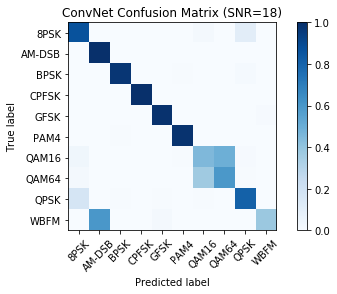

In [15]:
SNRs = [-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18]
classes = ['8PSK', 'AM-DSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16','QAM64', 'QPSK', 'WBFM']
testSNR = np.load("/content/drive/My Drive/com_three_SNR.npy").astype(int)
# Plot confusion matrix
acc = {}
for snr in SNRs:
    # load test SNRs
    test_X_i = cnn_testX[np.where(np.array(testSNR)==snr)]
    test_Y_i = cnn_testY[np.where(np.array(testSNR)==snr)]    
    # estimate classes
    test_Y_i_hat = cnn_bestmodel.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

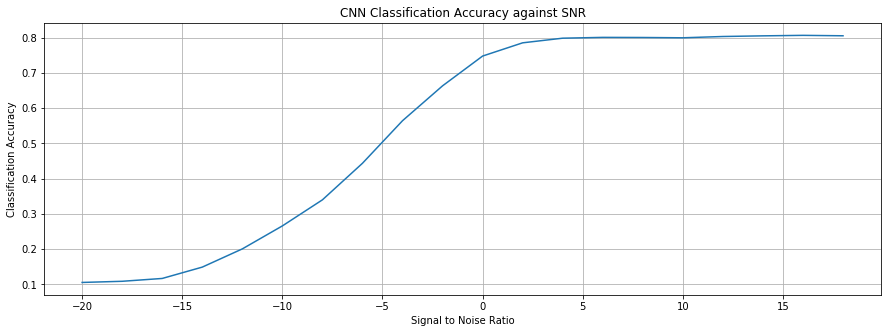

In [20]:
# Plot accuracy curve
plt.plot(SNRs,list(acc.values()));
plt.rcParams["figure.figsize"][0] = 15
plt.rcParams["figure.figsize"][1] = 5
plt.grid();
plt.xlabel("Signal to Noise Ratio");
plt.ylabel("Classification Accuracy");
plt.title("CNN Classification Accuracy against SNR");